In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


---
## **Loading Dataset**

In [5]:
df=pd.read_csv('D:\\Github\\PRODIGY_DS_03\\data\\bank\\bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


---
## **Data Understanding**

In [12]:
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.select_dtypes(include='number').columns.to_list()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
df.select_dtypes(include=['object','category']).columns.to_list()


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

---
## **Data Cleaning**

### Identifying Null Values

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Identifying Duplicate Rows

In [16]:
df.duplicated().sum()

np.int64(0)

### Identifying Unkown Values

In [35]:
df['job'].value_counts(),df['education'].value_counts(),df['contact'].value_counts()

(job
 management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 unknown           38
 Name: count, dtype: int64,
 education
 secondary    2306
 tertiary     1350
 primary       678
 unknown       187
 Name: count, dtype: int64,
 contact
 cellular     2896
 unknown      1324
 telephone     301
 Name: count, dtype: int64)

### Outlier Detection

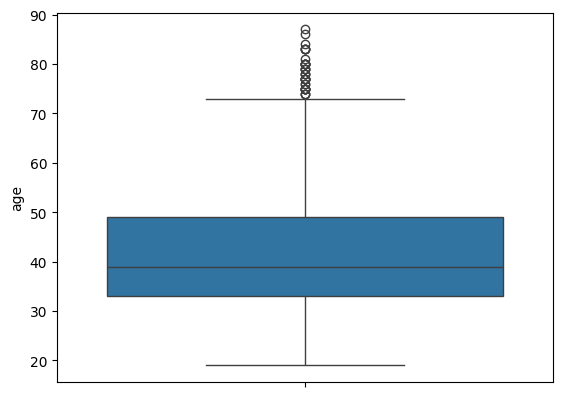

In [33]:
sns.boxplot(df['age'])
plt.show()

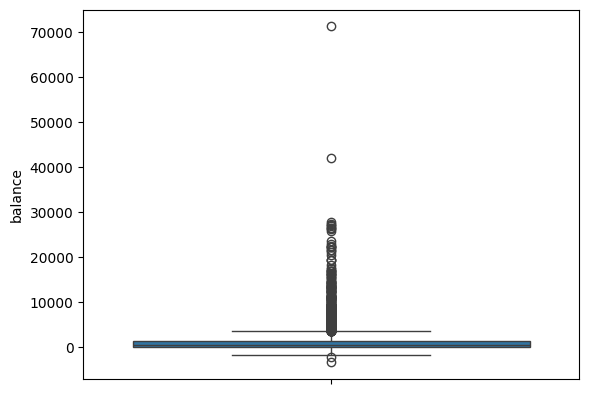

In [37]:
sns.boxplot(df['balance'])
plt.show()

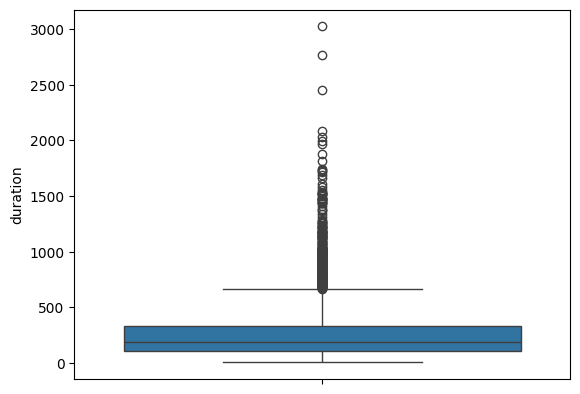

In [38]:
sns.boxplot(df['duration'])
plt.show()